### Script contents:

#### 1. Importing libraries and data
#### 2. Sample subset up to 3 min
Elbow technique

k-means clustering
#### 3. Sample subset >3 min <12 hours
Elbow technique

k-means clustering
#### 4. Sample subset >=12 hours
Elbow technique

k-means clustering

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# prompt matplotlib visuals to appear in notebook 
%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\Jay\Documents\UFO Sightings Analysis'

In [4]:
# Import most recent data set
df = pd.read_csv(os.path.join(path, '02 Data Sets', 'Prepared Data', 'ufo_sighting_data_clustered.csv'))

In [5]:
df.shape

(76933, 12)

In [6]:
df.head(5)

,Date_time,weekday,city,state/province,country,UFO_shape,length_seconds,duration_description,description,date_documented,latitude,longitude
0,11/11/1906,Sunday,wien,none,Austria,other,10800,3 h,The oldest professional photo of a UFO object ...,12/23/2002,48.208,16.374
1,6/1/1910,Wednesday,wills point,TX,United States,cigar,120,2 minutes,Cigar shaped object moving from West to East,4/16/2005,32.709,-96.008
2,4/5/1916,Wednesday,france,none,France,cigar,60,about 1 min.,((NUFORC Note: Possible hoax. PD)) Saw 3 ci...,3/9/2004,46.228,2.214
3,6/11/1920,Friday,cicero,IN,United States,unknown,60,1 minute,((NUFORC Note: Probable hoax. Note date. PD...,5/12/2009,40.124,-86.013
4,12/28/1925,Monday,atkinson,IL,United States,disk,60,1 minute,Young boy witnesses disc in sky above Illinois...,5/11/2005,41.421,-90.015


### 2. Sample subset up to 3 min

In [7]:
# Capture values up to 3 minutes from "length_seconds" variable
df_1 = df[df['length_seconds'] <=180] 

In [8]:
df_1['length_seconds'].min()

3

In [9]:
df_1['length_seconds'].max()

180

In [10]:
df_1['length_seconds'].mean()

64.46502964877604

In [11]:
df_1['length_seconds'].median()

45.0

In [12]:
# Create data frame with only numerical variables, for use with k-means algorithm
df_k = df_1[['length_seconds', 'latitude', 'longitude']]
df_k.head()

,length_seconds,latitude,longitude
1,120,32.709,-96.008
2,60,46.228,2.214
3,60,40.124,-86.013
4,60,41.421,-90.015
5,60,43.643,-118.628


#### Elbow technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df_k).score(df_k) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-206771025.3210771,
 -90618376.12830569,
 -55458284.465066634,
 -43666373.745159395,
 -34531298.035605036,
 -26282182.783272937,
 -21390152.506153222,
 -16973655.67071306,
 -14929614.02096718]

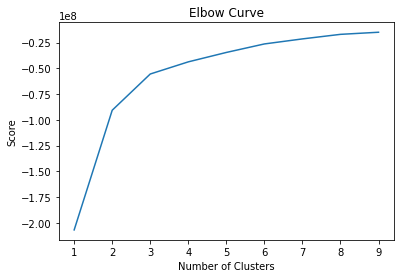

In [15]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### k-means clustering

In [16]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [17]:
# Fit the k-means object to the data
kmeans.fit(df_k)

C:\Users\Jay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [18]:
df_k['clusters'] = kmeans.fit_predict(df_k)

C:\Users\Jay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Jay\AppData\Local\Temp/ipykernel_22764/1531503818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k['clusters'] = kmeans.fit_predict(df_k)


In [19]:
df_k.head()

,length_seconds,latitude,longitude,clusters
1,120,32.709,-96.008,1
2,60,46.228,2.214,2
3,60,40.124,-86.013,0
4,60,41.421,-90.015,0
5,60,43.643,-118.628,0


In [20]:
df_k['clusters'].value_counts()

0    24611
1    12448
2     2403
Name: clusters, dtype: int64

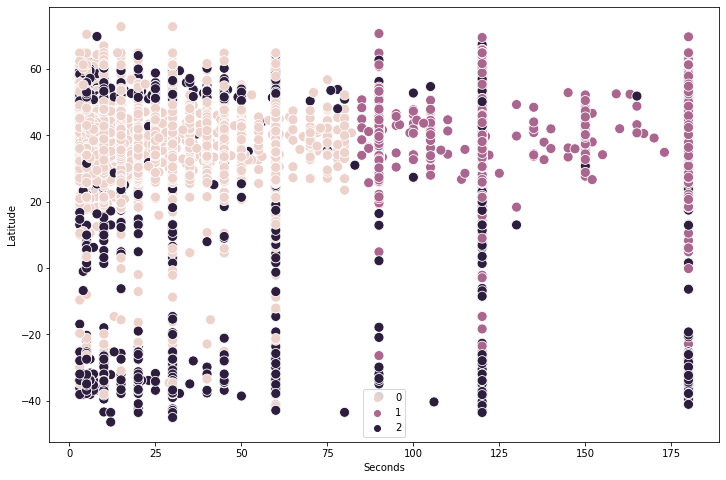

In [21]:
# Plot the clusters for the "length_seconds" and "latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['length_seconds'], y=df_k['latitude'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Seconds') # Label x-axis.
plt.ylabel('Latitude') # Label y-axis.
plt.show()

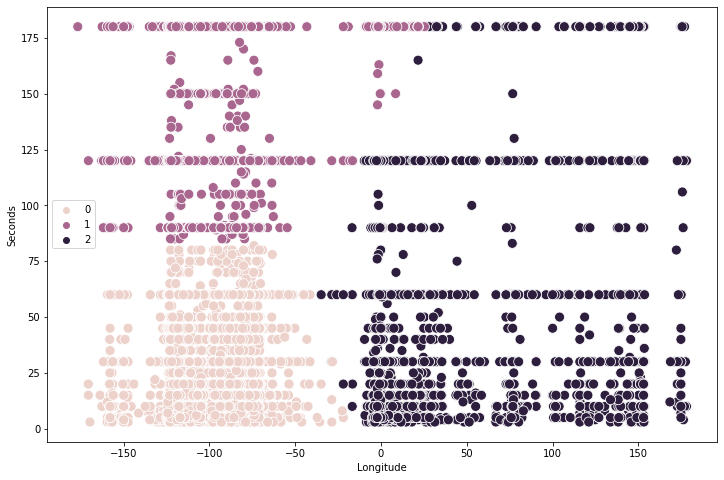

In [24]:
# Plot the clusters for the "longitude" and "length_seconds" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['longitude'], y=df_k['length_seconds'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Longitude') 
plt.ylabel('Seconds') 
plt.show()

In [25]:
# export current dataframe to Prepared Data
df_k.to_csv(os.path.join(path, '02 Data Sets', 'Prepared Data', 'ufo_sighting_upto3min.csv')) 

### 3. Sample subset >3 min <12 hours

In [68]:
# Capture values over 3 minutes & less than 12 hours from "length_seconds" variable
df_2 = df[df['length_seconds'] >180]

In [69]:
df_3 = df_2[df['length_seconds'] <43200] 

C:\Users\Jay\AppData\Local\Temp/ipykernel_22764/1266892662.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3 = df_2[df['length_seconds'] <43200]


In [70]:
df_3['length_seconds'].min()

181

In [71]:
df_3['length_seconds'].max()

42000

In [72]:
df_3['length_seconds'].mean()

1752.810050467089

In [73]:
df_3['length_seconds'].median()

600.0

In [74]:
# Create data frame with only numerical variables, for use with k-means algorithm
df_k = df_3[['length_seconds', 'latitude', 'longitude']]
df_k.head()

,length_seconds,latitude,longitude
0,10800,48.208,16.374
6,1200,42.509,-76.394
8,1800,38.917,-97.214
9,1800,40.760,-73.849
11,1200,52.250,-81.617


#### Elbow technique

In [75]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [76]:
score = [kmeans[i].fit(df_k).score(df_k) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-423718673010.9427,
 -160055210411.40314,
 -71735327235.14413,
 -41113333520.9614,
 -21876013805.330498,
 -14280144545.464748,
 -9638510976.319063,
 -6688987829.025064,
 -5331197172.432206]

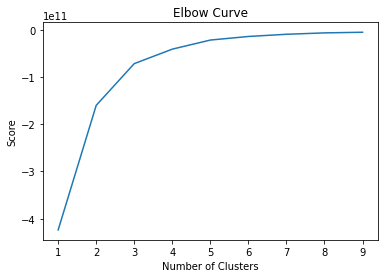

In [77]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### k-means clustering

In [78]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [79]:
# Fit the k-means object to the data
kmeans.fit(df_k)

C:\Users\Jay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [80]:
df_k['clusters'] = kmeans.fit_predict(df_k)

C:\Users\Jay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Jay\AppData\Local\Temp/ipykernel_22764/1531503818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k['clusters'] = kmeans.fit_predict(df_k)


In [81]:
df_k.head()

,length_seconds,latitude,longitude,clusters
0,10800,48.208,16.374,0
6,1200,42.509,-76.394,1
8,1800,38.917,-97.214,1
9,1800,40.760,-73.849,1
11,1200,52.250,-81.617,1


In [82]:
df_k['clusters'].value_counts()

1    34450
0     2418
2      384
Name: clusters, dtype: int64

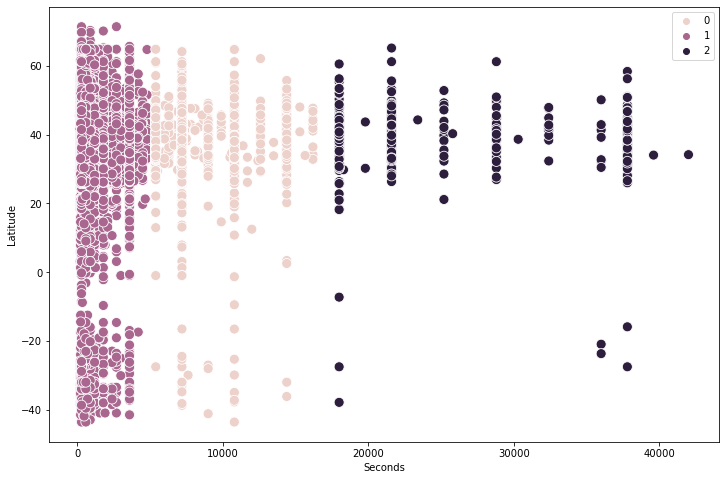

In [83]:
# Plot the clusters for the "length_seconds" and "latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['length_seconds'], y=df_k['latitude'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Seconds') # Label x-axis.
plt.ylabel('Latitude') # Label y-axis.
plt.show()

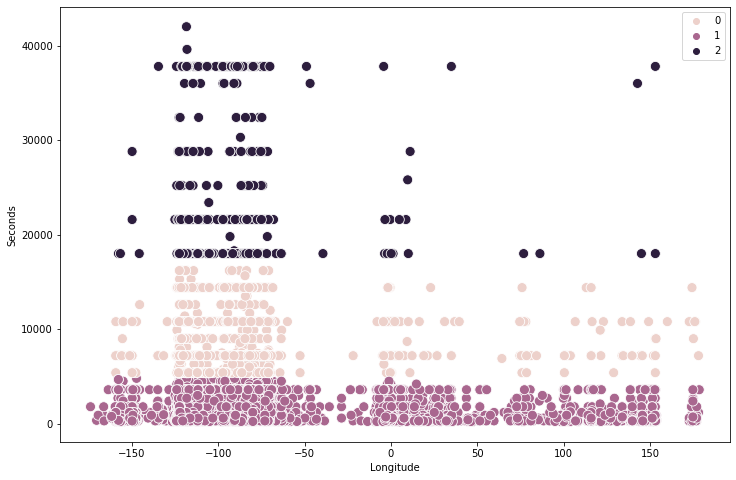

In [84]:
# Plot the clusters for the "longitude" and "length_seconds" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['longitude'], y=df_k['length_seconds'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Longitude') 
plt.ylabel('Seconds') 
plt.show()

In [85]:
# export current dataframe to Prepared Data
df_k.to_csv(os.path.join(path, '02 Data Sets', 'Prepared Data', 'ufo_sighting_3min-12hrs.csv')) 

### 4. Sample subset >=12 hours

In [86]:
# Capture values 12 hours or longer from "length_seconds" variable
df_4 = df[df['length_seconds'] >=43200] 

In [87]:
df_4['length_seconds'].min()

43200

In [88]:
df_4['length_seconds'].max()

1814400

In [89]:
df_4['length_seconds'].mean()

272249.3789954338

In [90]:
df_4['length_seconds'].median()

172800.0

In [91]:
# Create data frame with only numerical variables, for use with k-means algorithm
df_k = df_4[['length_seconds', 'latitude', 'longitude']]
df_k.head()

,length_seconds,latitude,longitude
44,777600,33.918,-106.865
133,181800,30.309,-89.330
437,432000,34.172,-118.378
438,86400,39.162,-84.457
439,604800,34.172,-118.378


#### Elbow technique

In [92]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [93]:
score = [kmeans[i].fit(df_k).score(df_k) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Jay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[-25034911131283.176,
 -6438299973061.411,
 -2671207290260.6665,
 -1484619597377.476,
 -538461087027.88586,
 -240617236833.2647,
 -126722618369.33351,
 -84726309923.67145,
 -56732709287.222946]

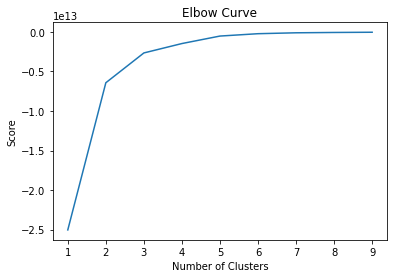

In [94]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### k-means clustering

In [95]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [96]:
# Fit the k-means object to the data
kmeans.fit(df_k)

C:\Users\Jay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [97]:
df_k['clusters'] = kmeans.fit_predict(df_k)

C:\Users\Jay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Jay\AppData\Local\Temp/ipykernel_22764/1531503818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k['clusters'] = kmeans.fit_predict(df_k)


In [98]:
df_k.head()

,length_seconds,latitude,longitude,clusters
44,777600,33.918,-106.865,2
133,181800,30.309,-89.330,0
437,432000,34.172,-118.378,2
438,86400,39.162,-84.457,0
439,604800,34.172,-118.378,2


In [99]:
df_k['clusters'].value_counts()

0    165
2     41
1     13
Name: clusters, dtype: int64

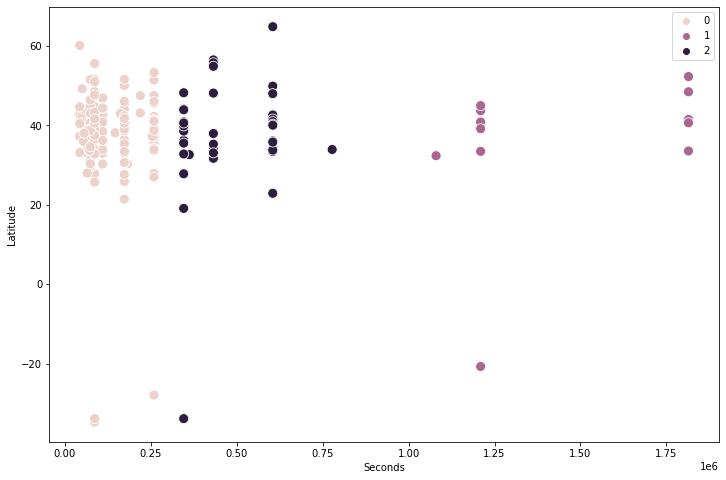

In [100]:
# Plot the clusters for the "length_seconds" and "latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['length_seconds'], y=df_k['latitude'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Seconds') # Label x-axis.
plt.ylabel('Latitude') # Label y-axis.
plt.show()

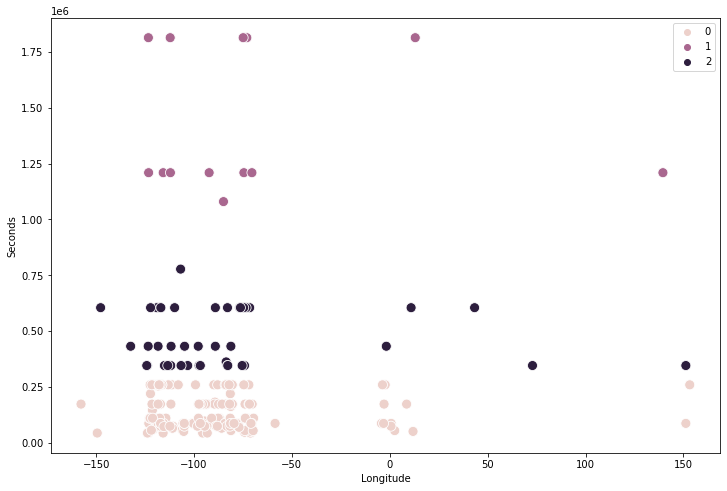

In [101]:
# Plot the clusters for the "longitude" and "length_seconds" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['longitude'], y=df_k['length_seconds'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Longitude') 
plt.ylabel('Seconds') 
plt.show()

In [102]:
# export current dataframe to Prepared Data
df_k.to_csv(os.path.join(path, '02 Data Sets', 'Prepared Data', 'ufo_sighting_12hrs&over.csv')) 